<a href="https://colab.research.google.com/github/SpiderCoop/Classificador_Perceptron_Cancer_Esofago/blob/master/Clasificador_Cancer_de_esofago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Clasificador de tejido sano y tejido cancerígeno en imágenes microscópicas del esófago

El presente script es parte del curso sobre el Perceptrón, impartido por el Colegio de Matemáticas Bourbaki.

Se utiliza Perceptrón lineal para realizar una clasificación binaria de un subconjunto de imágenes provenientes del Data Challenge by Mauna Kea.

Para este clasificador se utilizaron solamente las imágenes de tejido sano y las imágenes de tejido con displasia/cáncer. De manera que el conjuntode datos está formado por 1,469 imágenes de tejido sano (clase 0) y 3,594 imágenes de displasia/cáncer (clase 1).

# Paso 1. Carga de base de datos

Primero hay que extraer los datos de la carpeta comprimida "CarpetaImagenes.zip", hay un link a esta carpeta en el archivo README del repositorio. Una vez descomprimida se comenta el codigo para que no se corra de nuevo

In [ ]:
ruta_drive = '/content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/'

In [ ]:
# !unzip -u ruta_drive + 'CarpetaImagenes.zip' -d ruta_drive + 'Unzip/


Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: /content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/Unzip/im_102_29.png  
 extracting: /content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/Unzip/im_102_3.png  
 extracting: /content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/Unzip/im_102_31.png  
 extracting: /content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/Unzip/im_102_34.png  
 extracting: /content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/Unzip/im_102_36.png  
 extracting: /content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/Unzip/im_102_4.png  
 extracting: /content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/Unzip/im_102_40.png  
 extracting: /content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/Unzip/im_102_42.png  
 extracting: /content/drive/MyDrive/ML_&_AI_for_the_Working_Analyst/Perceptron/Unzip/im_102_44.png  
 extracting: /content/drive/MyDr

# Paso 2. Carga de librerias y modulos

In [ ]:
import random        # Módulo para aleatorizar.
import pickle        # Módulo para respaldar objetos de pyhton como cadenas de bytes
                     # (serialización de objetos).

import numpy as np   # Biblioteca para manejar matrices y operaciones de matrices
import pandas as pd  # Biblioteca para manejar tablas de datos.

# Funciones de la biblioteca Scikit-image para leer y mostrar una una imagen.
from skimage.io import imshow, imread

# Sklearn (Scikit-learn) es la  principal biblioteca para machine learning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Bibliotecas para gráficar y visualizar.
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 3. Lectura de las imagenes

Se toma toma la base de datos de las etiquetas. Esta contiene una columna con el nombre de la imagen y otra columna con la clase a la que pertenece 0=imagen de tejido sano y 1= imagen de displasia/cáncer

In [ ]:
ruta_data_github = "https://raw.githubusercontent.com/SpiderCoop/Classificador_Perceptron_Cancer_Esofago/master/Datos/ClasesImagenes.csv"

In [ ]:
datos = pd.read_csv(ruta_data_github, usecols=[1,2])

## Exploracion de la base de datos

In [ ]:
# Muestra el tipo de datos
type(datos)

pandas.core.frame.DataFrame

In [ ]:
 # Muestra los primeros cinco registros.
datos.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [ ]:
# ¿Con cuántas imagenes vamos a trabajar?
datos.shape[0]

5063

In [ ]:
# ¿cuántas imagenes tenemos de cada clase?
datos['class_number'].value_counts(sort=False)

,count
class_number,
0,1469
1,3594


## Exploracion de un registro (imagen)

In [ ]:
nombre_archivo = 'im_4_0.png'
imagen = imread(ruta_drive  + nombre_archivo, as_gray=True)

In [ ]:
# ¿Qué tipo de objeto es imagen?
type(imagen)

numpy.ndarray

In [ ]:
# ¿Qué dimensiones tiene imagen?
imagen.shape

(260, 260)

In [ ]:
# Exploramos el nivel de coloración de algunos de los pixeles de la imagen
imagen[180, 170:190]

array([0.22525176, 0.22525176, 0.22525176, 0.22525176, 0.21964078,
       0.21738588, 0.21738588, 0.21738588, 0.21738588, 0.21738588,
       0.21738588, 0.21738588, 0.21738588, 0.21429765, 0.21429765,
       0.21964078, 0.23142824, 0.23929412, 0.23142824, 0.23142824])

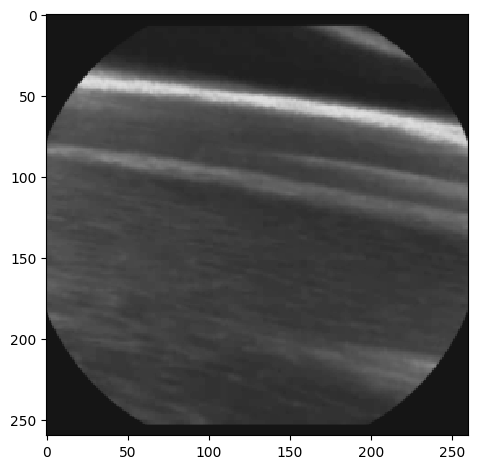

In [ ]:
# Muestra la imagen
imshow(imagen)

## Guardar las imagenes en un solo objeto

Se itera por cada imagen para crear una matriz de numpy con los valores de los pixeles y se guarda en un registro de un dataframe de pandas. Es decir se crea un dataframe en donde cada renglon es una matriz numerica que representa una imagen

Una vez que se crea el objeto img se comenta la linea de codigo para no ejecutar varias veces, de igual manera la carga del archivo pickle

In [ ]:
# %time  img = datos['image_filename'].apply(lambda x: imread(ruta_drive + x, as_gray=True))

CPU times: user 53.5 s, sys: 20.9 s, total: 1min 14s
Wall time: 2min 58s


In [ ]:
# Guardar en archivo pickle para poder recuperarlo mas facilmente posteriormente
#pickle.dump(img, open (ruta_drive + "imagenes_numpy.pkl", 'wb'))

## Carga de la base

In [ ]:
# Leer archivo pickle
img = pickle.load(open(ruta_drive + "imagenes_numpy.pkl", 'rb'))

## Preparación de variables explicativas y objetivo

Se debe de transformar la secuencia de matrices img en una sola matriz Inicialmente, img es una Serie de pandas donde cada elemento es una matriz NumPy que representa una imagen.

La funcion "np.stack" pertenece a NumPy y se utiliza para unir una secuencia de matrices a lo largo de un nuevo eje.

Esto significa que cada matriz de imagen se convierte en una "capa" del array resultante. El objeto resultante es un array de 3 dimensiones.

In [ ]:
# # Toma una secuencia de matrices y las apila a lo largo de un tercer eje para hacer una solo arreglo
IMG = np.stack(img, axis=0)
IMG.shape

(5063, 260, 260)

Despues, para cada imagen o capa se aplana la matriz de 2 dimensiones (260x260 pixeles) a una sola dimensión, para obtener un vector por imagen.

El objeto resultante es un array de 2 dimensiones en donde cada capa o imagen esta representada por un solo vector

In [ ]:
# El array resultante es el que se usara para ajustar el modelo
X = IMG.reshape( 5063, -1)
X.shape

(5063, 67600)

In [ ]:
# Guardamos las etiquetas de las imagenes como Series de Pandas.
y = datos['class_number']

## Visualizacion

In [ ]:
# Con el método GroupBy de Pandas separamos el data frame en dos, de acuerdo con la etiqueta
porClase = datos.groupby('class_number')

In [ ]:
# Elijimos al azar n muestras de cada subconjunto y guardamos la posición de las
# imagenes cancerigenas en la lista "c" y en  "s" las de tejido sano.
n = 20
c = random.sample(porClase.get_group(1).index.tolist(), n)
s = random.sample(porClase.get_group(0).index.tolist(), n)

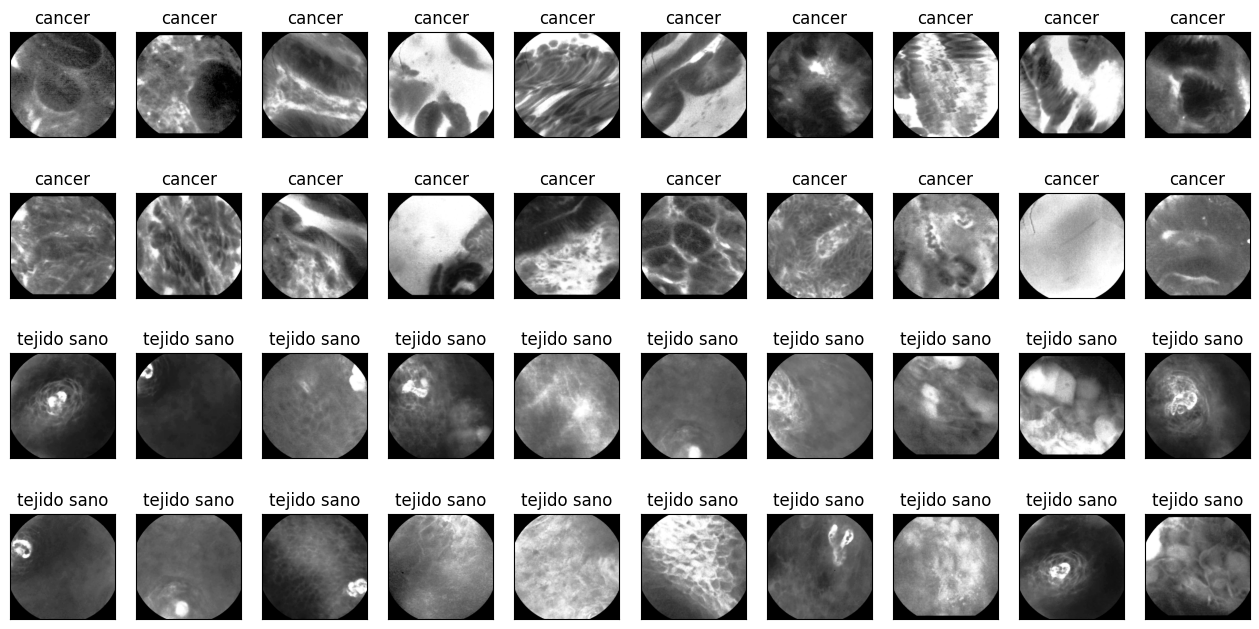

In [ ]:
# Creamos el espacio para las 40 imagenes que vamos a desplegar
fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 4

# Desplegamos las imagenes
for i in range(0, 40):
    fig.add_subplot( rows, columns, i+1)
    if i < 20:
        plt.imshow(img[c[i]], cmap='Greys_r')
        plt.title('cancer')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(img[s[i-20]], cmap='Greys_r')
        plt.title('tejido sano')
        plt.xticks([])
        plt.yticks([])
plt.show()

# Paso 4. Construccion del modelo

## Creacion de conjuntos de entrenamiento y validacion

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Tejido Sano:        ', counts[0],'\nDisplasia o Cáncer: ', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Tejido Sano:         ', counts[0],'\nDisplasia o Cáncer: ', counts[1],'\n')

Training set
X:  (3544, 67600)
y:  (3544,)
Tejido Sano:         1043 
Displasia o Cáncer:  2501 

Test set
X:  (1519, 67600)
y:  (1519,)
Tejido Sano:          426 
Displasia o Cáncer:  1093 



## Entrenamiento del modelo

El modelo de perceptron toma como parametros el maximo de iteraciones sobre todo la base de datos, es decir, el numero de epocas; parametro de semilla para el muestreo aleatorio

In [ ]:
model = Perceptron(max_iter=1000, random_state=0, verbose=False)
model.fit(X_train, y_train)

print("Iterations: ", model.n_iter_)

Iterations:  44


In [ ]:
# Guardamos los coeficientes del modelo
betas = model.coef_
betas.shape

(1, 67600)

In [ ]:
beta0 = model.intercept_
beta0

array([-42.])

# Paso 5. Prediccion

In [ ]:
y_predict = model.predict(X_test)  # Clasifica cada imagen de X_test
y_predict[:20]

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

# Paso 6. Evaluacion

In [ ]:
y_test.to_numpy()[:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
print("Exactitud conjunto entrenamiento: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model.score(X_test, y_test)*100.0))

Exactitud conjunto entrenamiento: 95.49%
Exactitud conjunto prueba: 90.19%


In [ ]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_predict
        }
df = pd.DataFrame(data)
df

,Y_Real,Y_Prediccion
3284,0,0
142,1,1
2625,1,1
2066,1,1
72,0,1
...,...,...
1569,1,1
5057,1,1
1422,0,0
2044,1,1


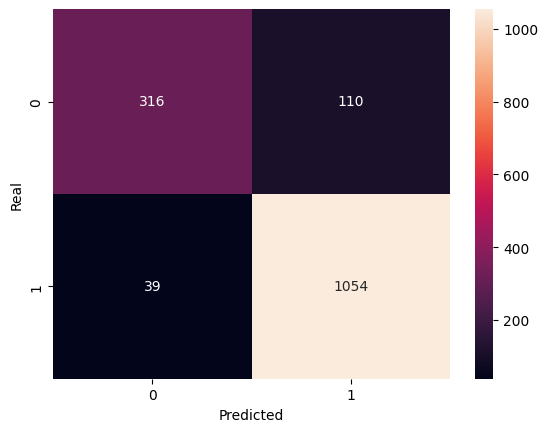

In [ ]:
# Matriz de confusión

confusion_matrix = pd.crosstab(df['Y_Real'],
                               df['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()